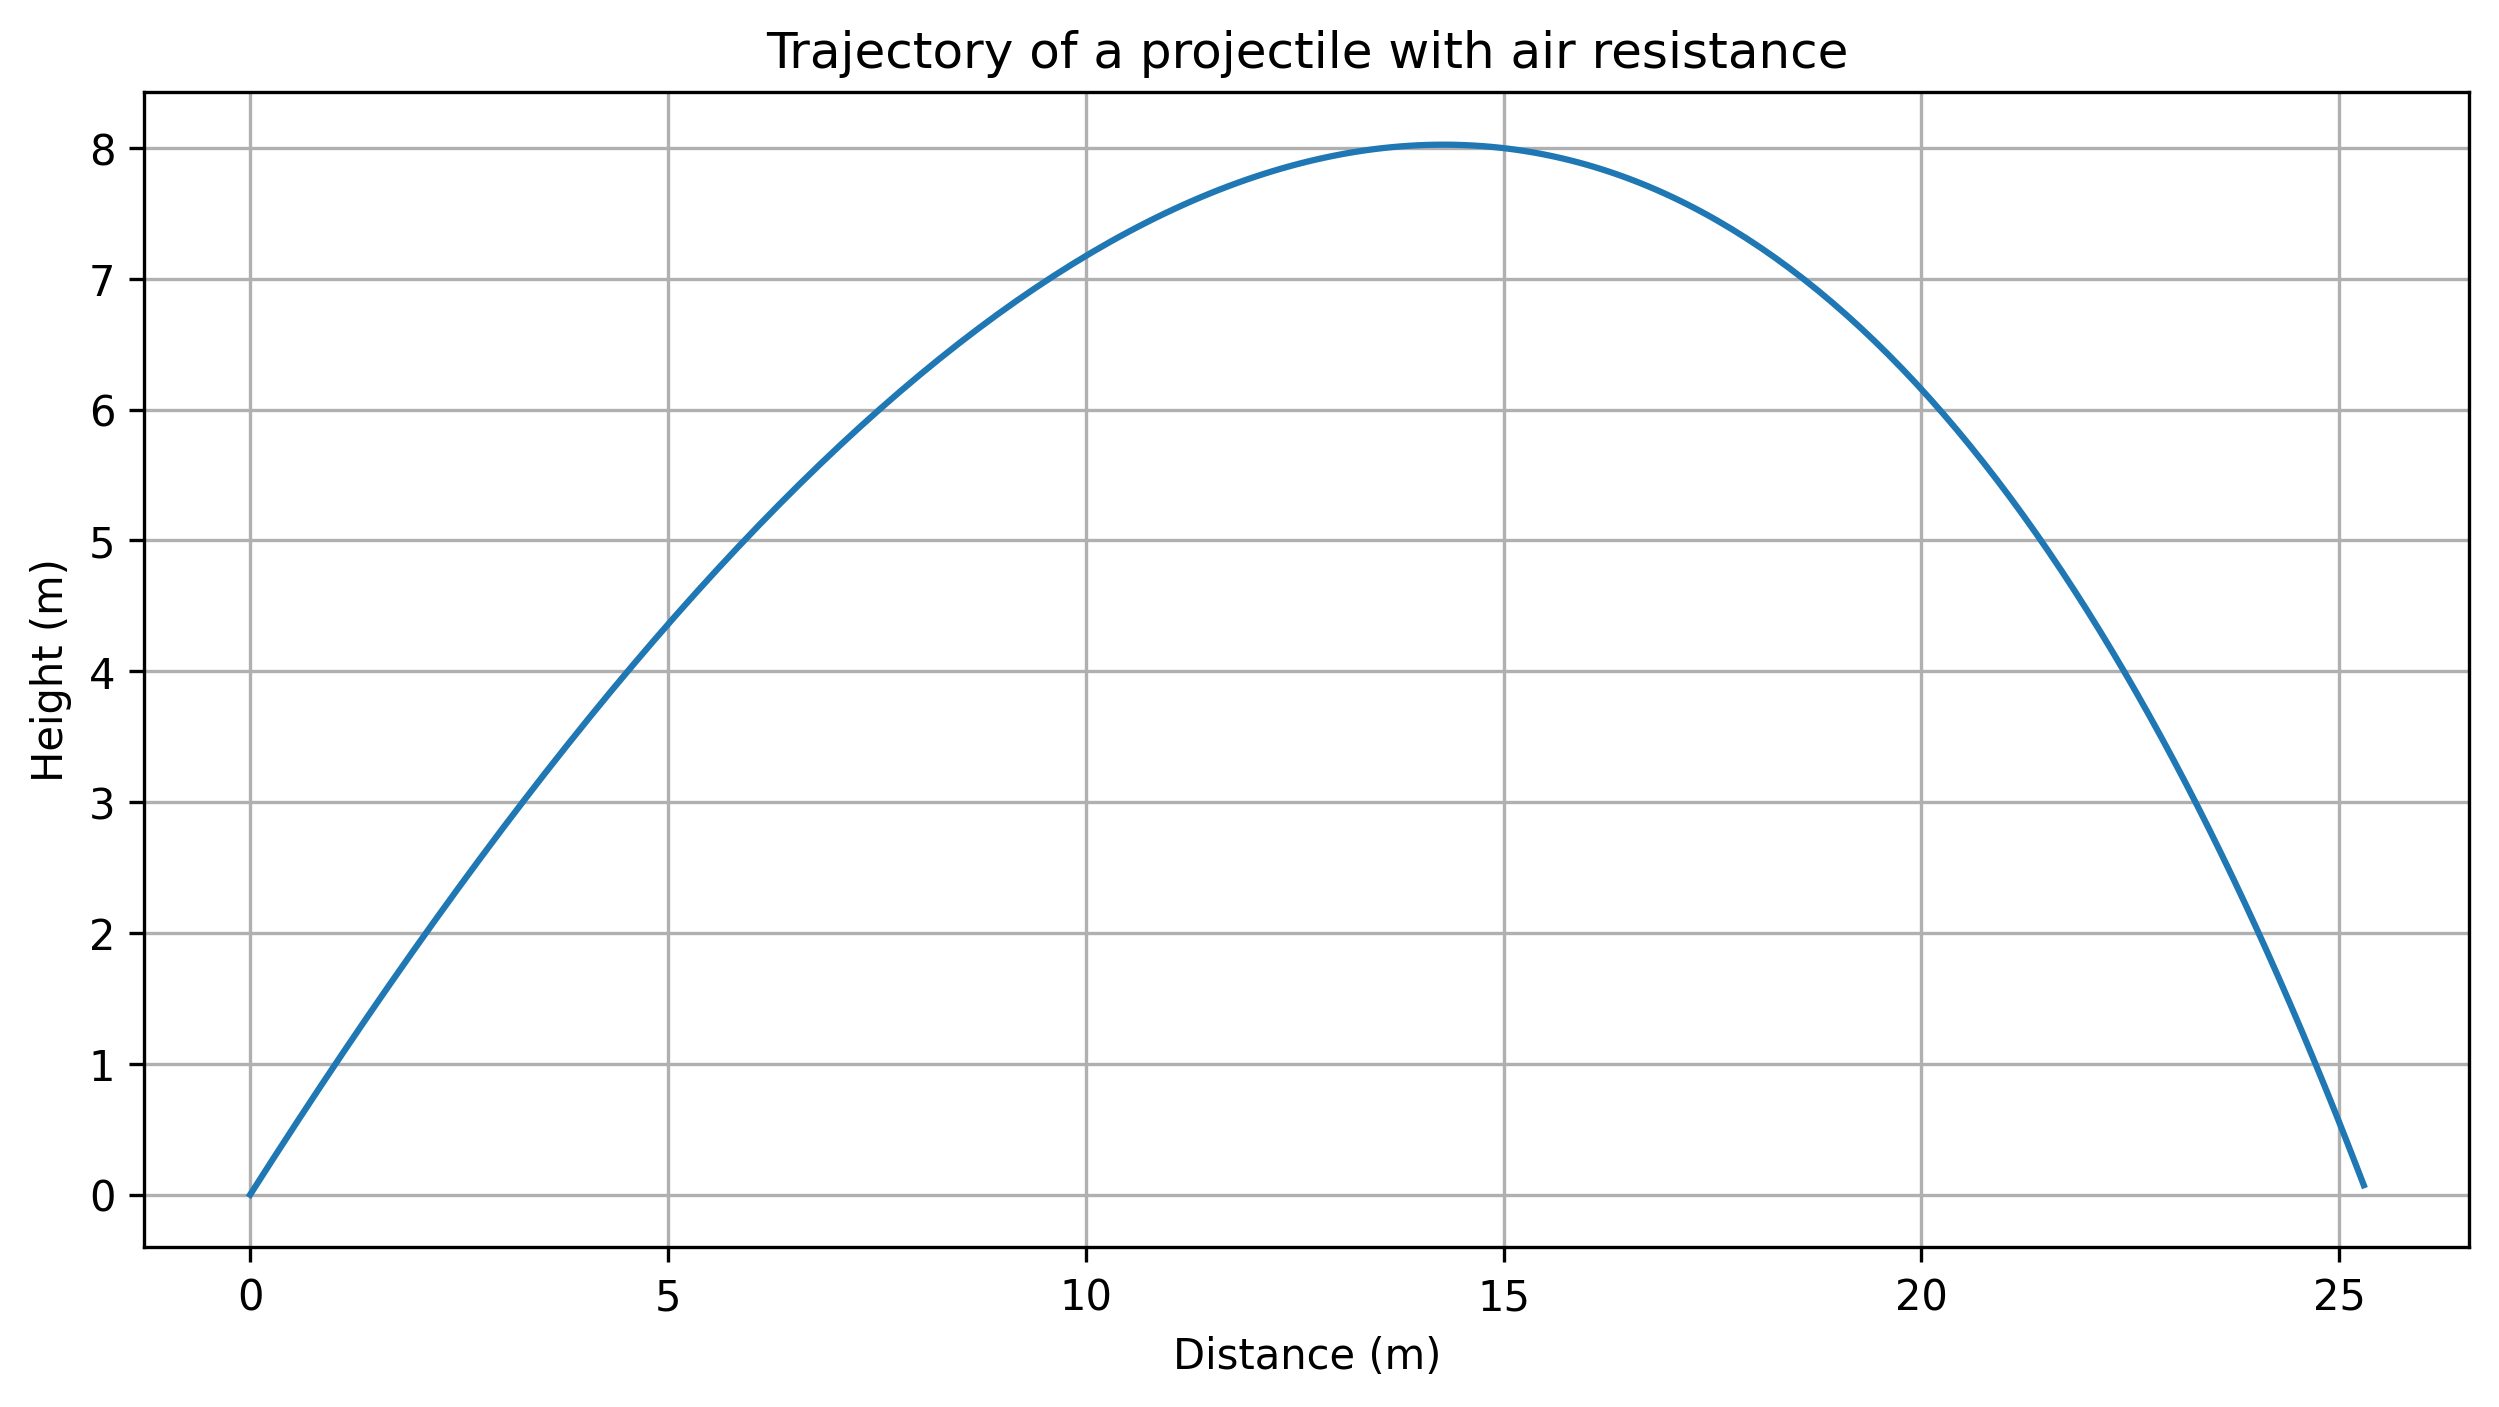

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 초기 조건
v0 = 20.0  # 초기 속도 (m/s)
angle = 45.0  # 발사 각도 (도)
g = 9.81  # 중력 가속도 (m/s^2)
k = 0.3  # 공기 저항 계수

# 초기 속도 벡터
vx0 = v0 * np.cos(np.radians(angle))
vy0 = v0 * np.sin(np.radians(angle))

# 시간 설정
t0 = 0
tf = 5
dt = 0.01
t = np.arange(t0, tf, dt)

# 궤적 계산을 위한 배열 초기화
x = np.zeros(len(t))
y = np.zeros(len(t))
vx = np.zeros(len(t))
vy = np.zeros(len(t))

# 초기 조건 설정
x[0], y[0] = 0, 0
vx[0], vy[0] = vx0, vy0

# Euler 방법을 사용한 수치적 계산
for i in range(1, len(t)):
    # 속도의 변화
    dvx = -k * vx[i-1] * dt
    dvy = -(g + k * vy[i-1]) * dt
    # 속도 업데이트
    vx[i] = vx[i-1] + dvx
    vy[i] = vy[i-1] + dvy
    # 위치 업데이트
    x[i] = x[i-1] + vx[i-1] * dt
    y[i] = y[i-1] + vy[i-1] * dt
    # 지면에 닿으면 반복 중단
    if y[i] < 0:
        break

# 궤적 시각화
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(x[:i], y[:i])
plt.title('Trajectory of a projectile with air resistance')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.show()

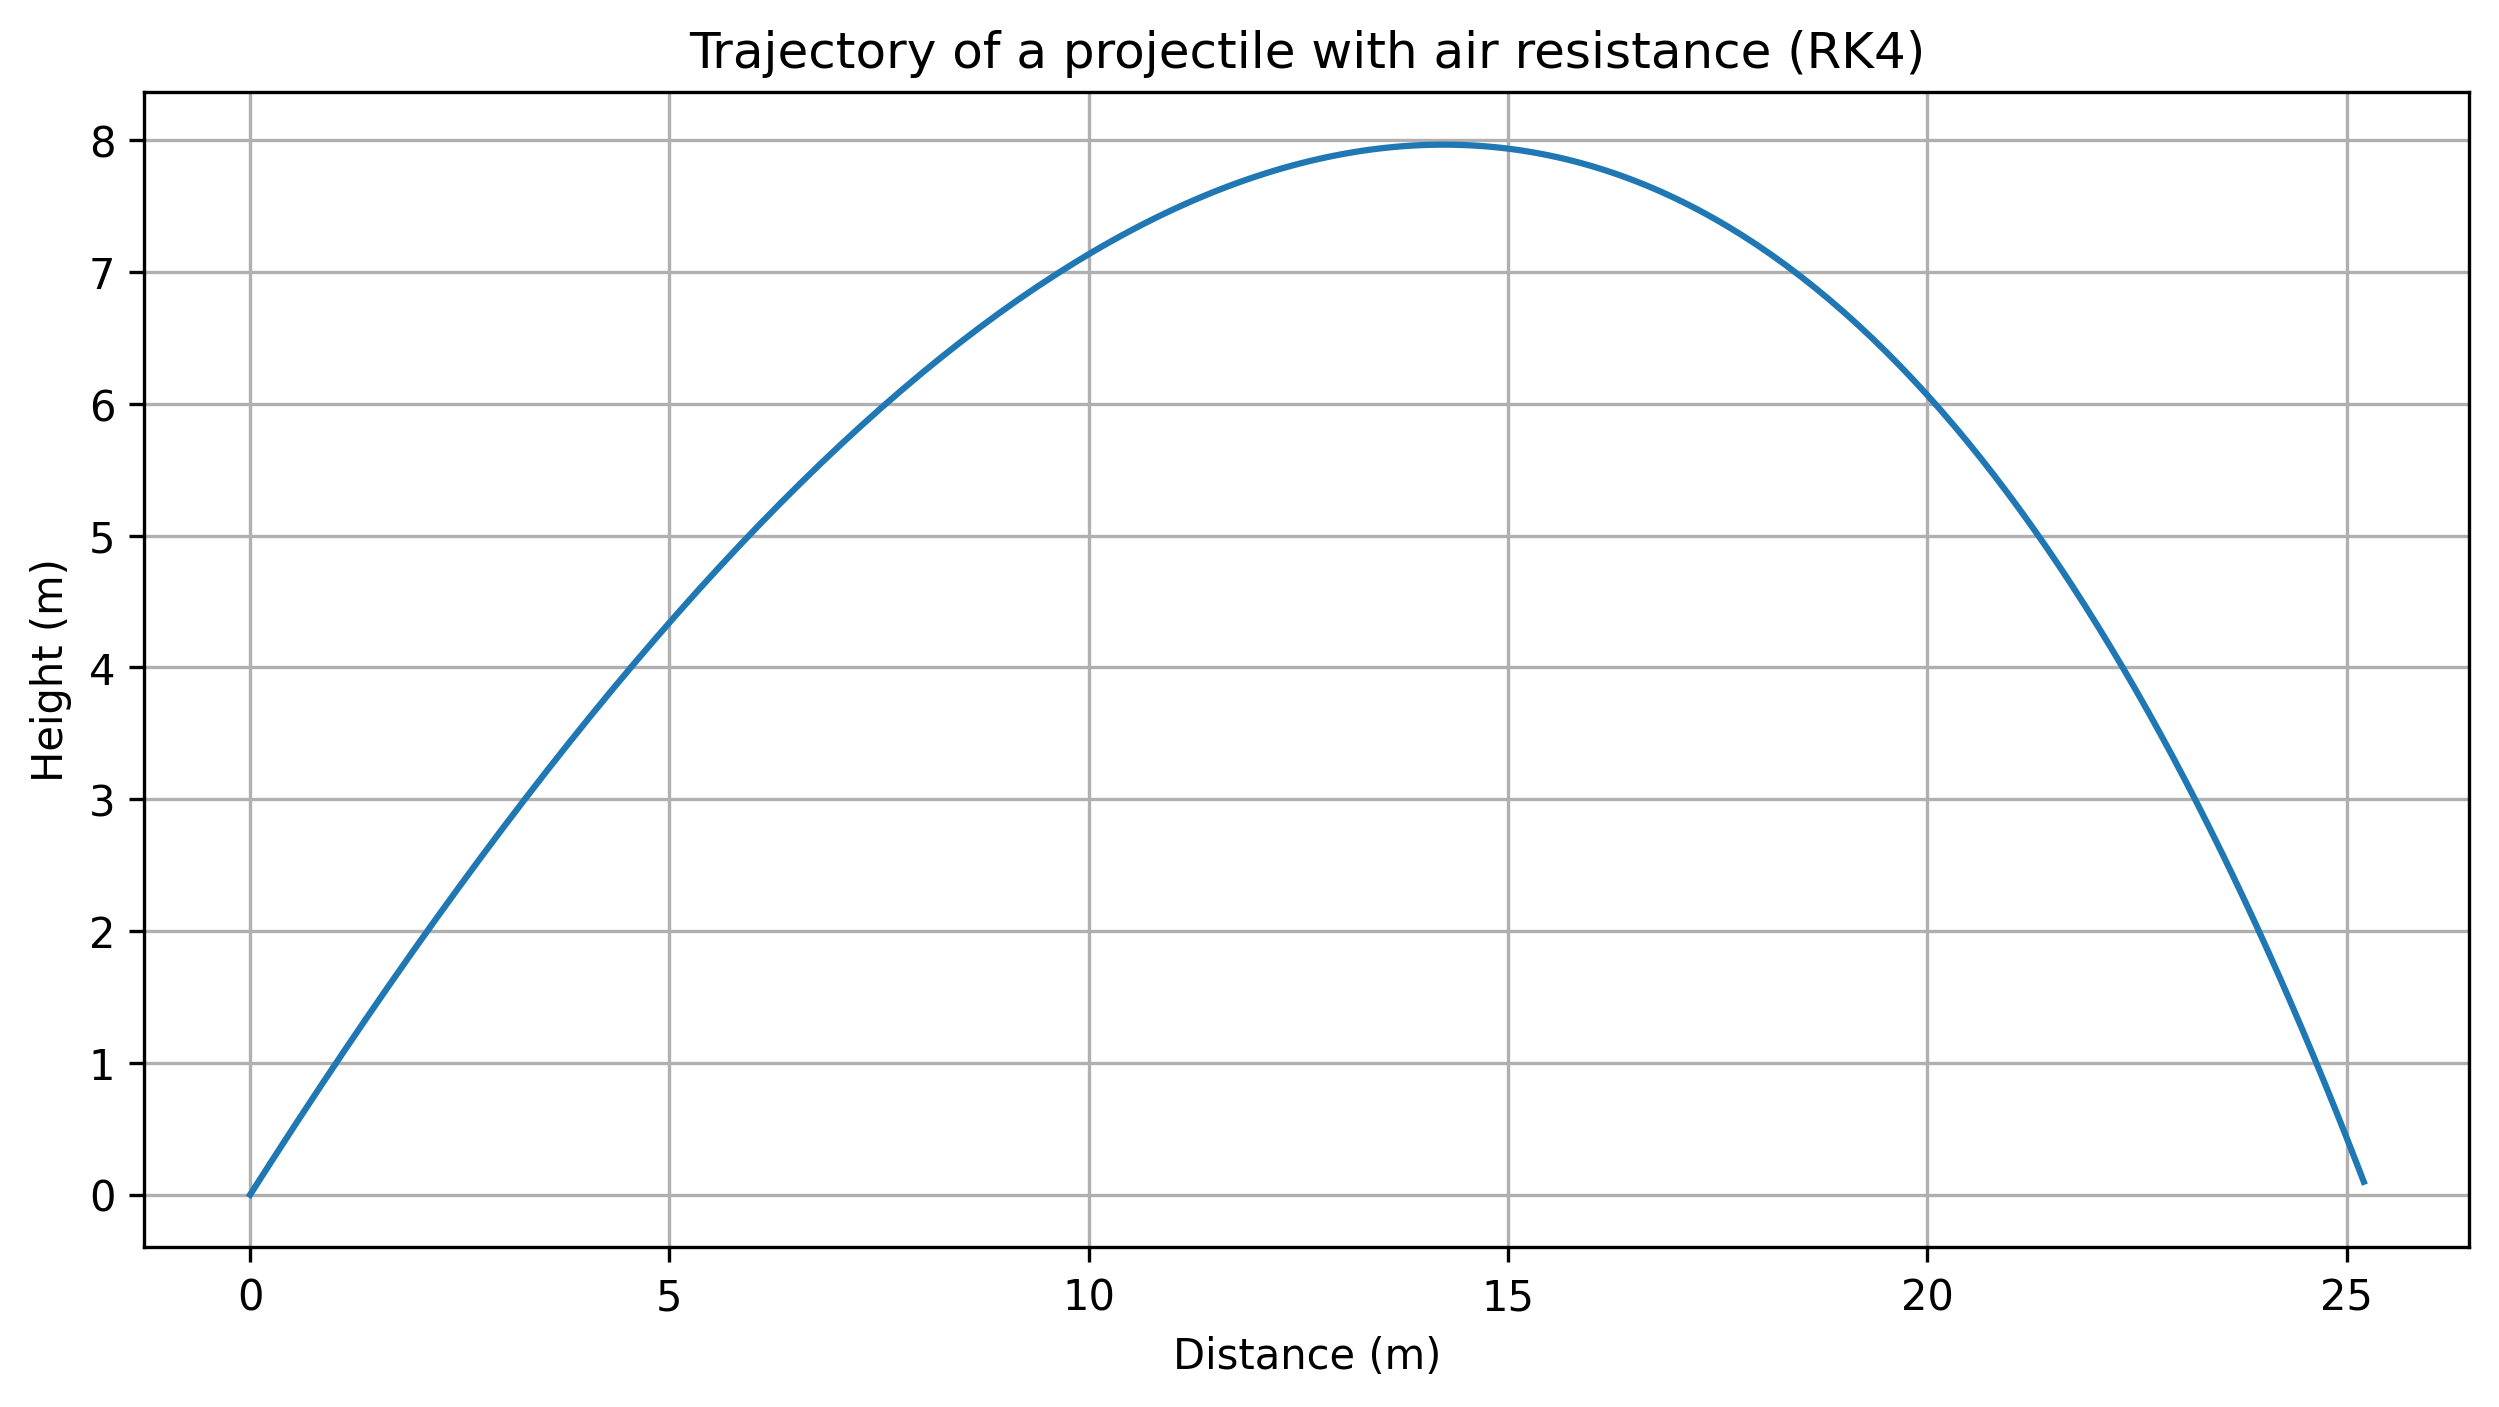

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 초기 조건
v0 = 20.0 # 초기 속도 (m/s)
angle = 45.0 # 발사 각도 (도)
g = 9.81 # 중력 가속도 (m/s^2)
k = 0.3 # 공기 저항 계수

# 초기 속도 벡터
vx0 = v0 * np.cos(np.radians(angle))
vy0 = v0 * np.sin(np.radians(angle))

# 시간 설정
t0 = 0
tf = 5
dt = 0.01
t = np.arange(t0, tf, dt)

# 궤적 계산을 위한 배열 초기화
x = np.zeros(len(t))
y = np.zeros(len(t))
vx = np.zeros(len(t))
vy = np.zeros(len(t))

# 초기 조건 설정
x[0], y[0] = 0, 0
vx[0], vy[0] = vx0, vy0

# 미분방정식을 선형화하여 Runge-Kutta 4차 방법을 적용하는 함수
def F(t, z):
    x, y, vx, vy = z
    
    # dx / dt = vx
    # dy / dt = vy
    # dvx / dt = -k*vx
    # dvy / dt = -g-k*vy

    return np.array([vx, vy, -k*vx, -g-k*vy])

# Runge-Kutta 4차 방법을 사용한 수치적 계산
for i in range(1, len(t)):
    z = np.array([x[i-1], y[i-1], vx[i-1], vy[i-1]])
    k1 = F(t[i-1], z)
    k2 = F(t[i-1] + dt/2, z + dt/2 * k1)
    k3 = F(t[i-1] + dt/2, z + dt/2 * k2)
    k4 = F(t[i-1] + dt, z + dt * k3)
    z += dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    x[i], y[i], vx[i], vy[i] = z
    
    # 지면에 닿으면 반복 중단
    if y[i] < 0:
        break

# 궤적 시각화
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(x[:i], y[:i])
plt.title('Trajectory of a projectile with air resistance (RK4)')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.show()

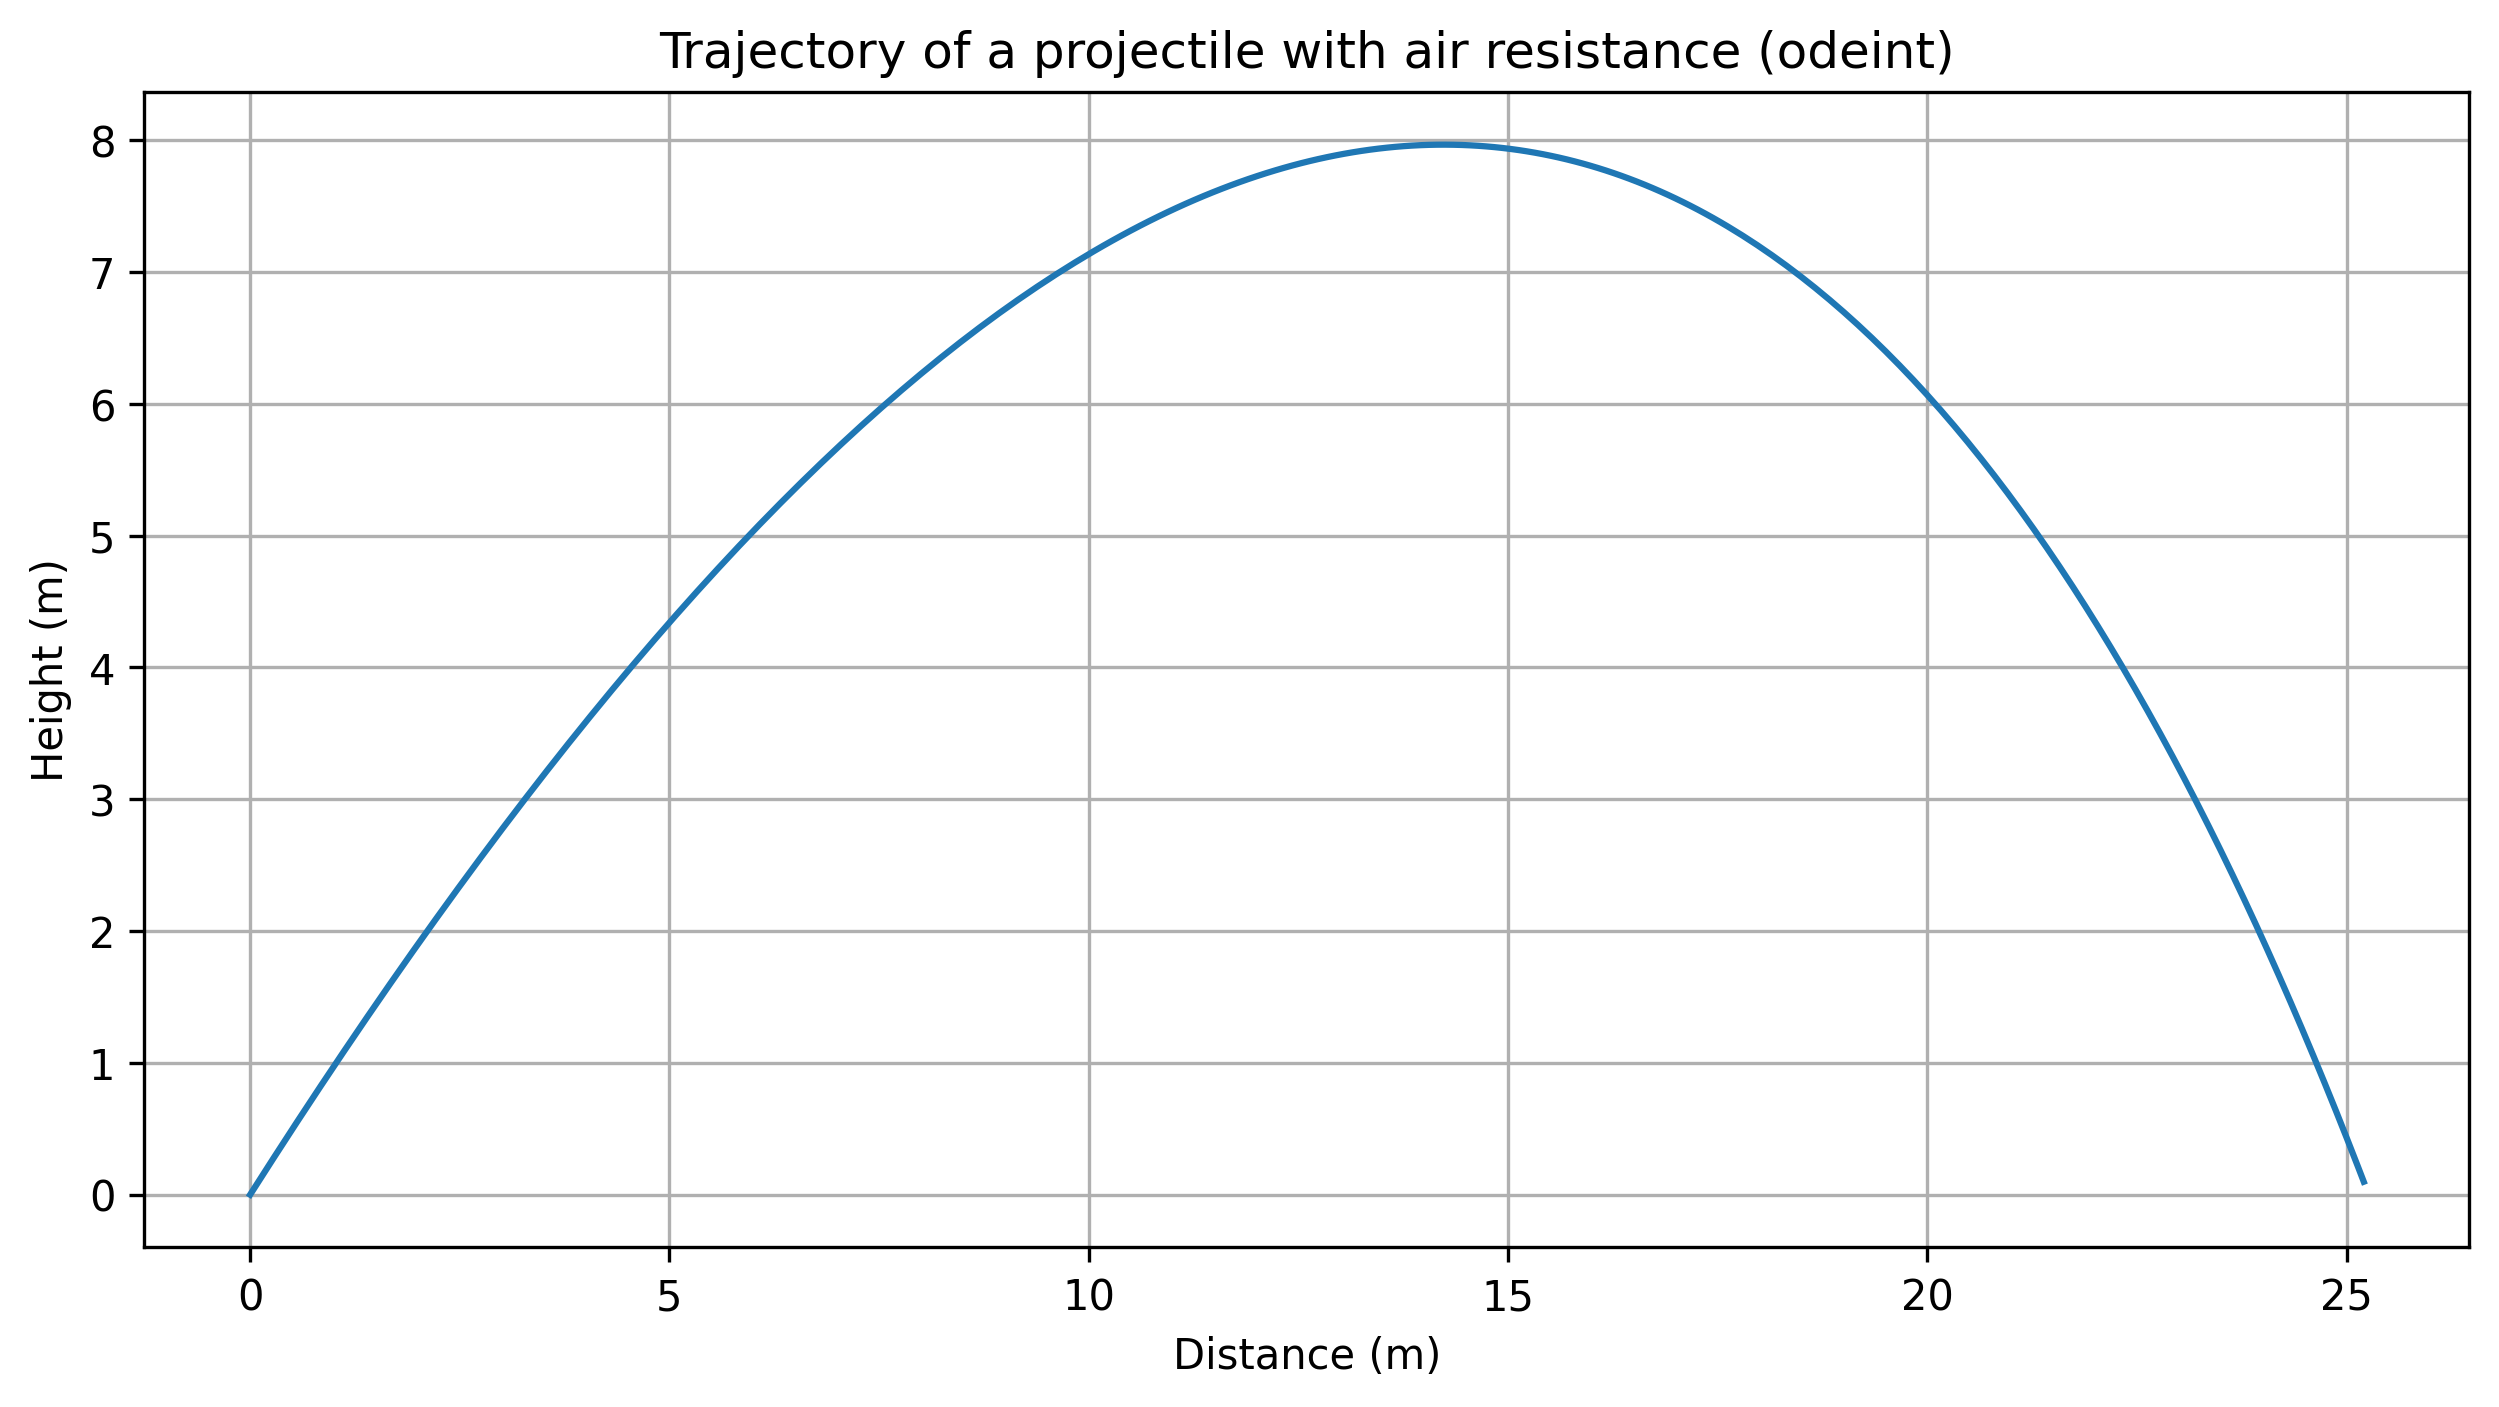

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 초기 조건
v0 = 20.0  # 초기 속도 (m/s)
angle = 45.0  # 발사 각도 (도)
g = 9.81  # 중력 가속도 (m/s^2)
k = 0.3  # 공기 저항 계수

# 초기 속도 벡터
vx0 = v0 * np.cos(np.radians(angle))
vy0 = v0 * np.sin(np.radians(angle))

# 시간 설정
t0 = 0
tf = 5
dt = 0.01
t = np.arange(t0, tf, dt)

# 미분방정식을 정의하는 함수
def dydt(y, t):
    x, vx, y, vy = y
    return [vx, -k*vx, vy, -g-k*vy]

# 초기 조건
y0 = [0, vx0, 0, vy0]

# scipy.integrate.odeint를 사용하여 미분방정식을 풀이
sol = odeint(dydt, y0, t)

# 결과 추출
x = sol[:, 0]
y = sol[:, 2]

# 지면에 닿은 지점 찾기
ground_hit = np.argwhere(y < 0)
if len(ground_hit) > 0:
    hit_index = ground_hit[0][0]
    x = x[:hit_index]
    y = y[:hit_index]

# 궤적 시각화
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(x, y)
plt.title('Trajectory of a projectile with air resistance (odeint)')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.show()